<a href="https://colab.research.google.com/github/Faouzi-Slimi/python_Avancee/blob/main/TP_DOGS_CATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library
import pandas as pd 
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
# Function to get Data 
def get_data_set (filepath) :
  imgs=[]
  labels=[]
  for f in os.listdir(filepath) :
    #if not (f.endswith('pgm')):   
      print('reding file :' +f)
      img=cv2.imread(filepath+'/'+f)
      resized = cv2.resize(img,(256,256))
      imgs.append(resized)
      if f.split('.')[0]=="dog":
        labels.append(0)
      else:
        labels.append(1)
  print('reding file finished')
  return np.asarray(imgs),labels

In [3]:
# Connect colab To Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Get Data
filepath=('/content/drive/MyDrive/Data/')
imgs1,labels=get_data_set(filepath)

reding file :cat.4013.jpg
reding file :cat.4012.jpg
reding file :cat.4001.jpg
reding file :cat.4028.jpg
reding file :cat.4024.jpg
reding file :cat.4023.jpg
reding file :cat.4016.jpg
reding file :cat.4034.jpg
reding file :cat.4006.jpg
reding file :cat.4025.jpg
reding file :cat.4004.jpg
reding file :cat.4015.jpg
reding file :cat.4002.jpg
reding file :cat.4005.jpg
reding file :cat.4027.jpg
reding file :cat.4026.jpg
reding file :cat.4003.jpg
reding file :cat.4017.jpg
reding file :cat.4014.jpg
reding file :dog.4037.jpg
reding file :cat.4036.jpg
reding file :cat.4046.jpg
reding file :dog.4004.jpg
reding file :cat.4035.jpg
reding file :dog.4039.jpg
reding file :dog.4003.jpg
reding file :cat.4047.jpg
reding file :dog.4036.jpg
reding file :dog.4048.jpg
reding file :cat.4045.jpg
reding file :dog.4026.jpg
reding file :dog.4016.jpg
reding file :dog.4046.jpg
reding file :dog.4005.jpg
reding file :dog.4002.jpg
reding file :dog.4006.jpg
reding file :dog.4001.jpg
reding file :cat.4039.jpg
reding file 

In [5]:
# Model For imgs Rotaion and Flipping
import tensorflow as tf
data_augmentation = tf.keras.Sequential([
    
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

In [6]:
# Generate dat
image_aug=[]
labels_aug = []
for k in range(len(imgs1)):
  i = imgs1[k]
  for j in range(9) :
    augmented_image = data_augmentation(i)
    image_aug.append(augmented_image)
    labels_aug.append(labels[k])
   

In [7]:
# Concatenate old data and Generate Data
for i in imgs1 :
  image_aug.append(i)
for i in labels :
  labels_aug.append(i)  

In [8]:
# Split Data

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(image_aug,labels_aug,test_size=0.33)

xtrain = np.array(xtrain)
xtest = np.array(xtest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)


In [9]:
# Import Library
import keras
from keras import layers
from keras import Sequential
import tensorflow as tf




In [10]:
## Model 1


# Set the random seed
tf.random.set_seed(42)
# Create the model

model1 = Sequential()
model1.add(layers.Conv2D(270,kernel_size=(14,14),input_shape=(256,256,3),strides =1,activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(4,4),strides=3))
model1.add(layers.Flatten())
model1.add(layers.Dense(180,activation = 'relu'))
model1.add(layers.Dense(1,activation="sigmoid"))

In [11]:

# Compile The model

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001),loss=tf.keras.losses.BinaryCrossentropy(),metrics = ["accuracy"])

In [12]:
History = model1.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=32,epochs=19)

Epoch 1/19
13/13 [==============================] - 18s 913ms/step - loss: 65.1187 - accuracy: 0.5721 - val_loss: 4.2468 - val_accuracy: 0.7374
Epoch 2/19
13/13 [==============================] - 9s 693ms/step - loss: 4.1247 - accuracy: 0.7463 - val_loss: 5.3635 - val_accuracy: 0.6970
Epoch 3/19
13/13 [==============================] - 9s 699ms/step - loss: 4.2937 - accuracy: 0.7761 - val_loss: 6.0682 - val_accuracy: 0.6919
Epoch 4/19
13/13 [==============================] - 9s 705ms/step - loss: 1.6251 - accuracy: 0.8731 - val_loss: 2.3261 - val_accuracy: 0.8232
Epoch 5/19
13/13 [==============================] - 9s 701ms/step - loss: 0.4259 - accuracy: 0.9478 - val_loss: 2.3581 - val_accuracy: 0.7980
Epoch 6/19
13/13 [==============================] - 9s 695ms/step - loss: 0.2407 - accuracy: 0.9552 - val_loss: 2.0991 - val_accuracy: 0.7879
Epoch 7/19
13/13 [==============================] - 9s 689ms/step - loss: 0.1828 - accuracy: 0.9652 - val_loss: 1.6545 - val_accuracy: 0.8182
Epoc

In [13]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 243, 243, 270)     159030    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 270)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1728000)           0         
                                                                 
 dense (Dense)               (None, 180)               311040180 
                                                                 
 dense_1 (Dense)             (None, 1)                 181       
                                                                 
Total params: 311,199,391
Trainable params: 311,199,391
Non-trainable params: 0
________________________________________

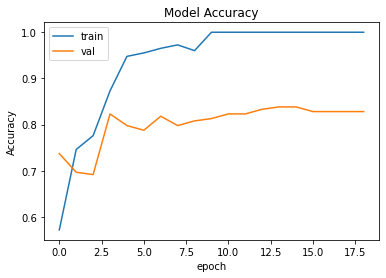

In [14]:
# Plot accuracy, loss ,  val_accuracy and val_los
import matplotlib.pyplot as plt
## Accuracy and val_accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

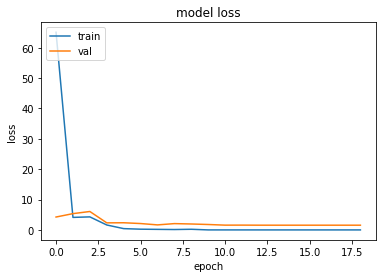

In [15]:
## loss and val_loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
####### Predict data
#### import data
cats = cv2.imread("/content/drive/MyDrive/cats.jpg")
dogs = cv2.imread("/content/drive/MyDrive/dogs.jpg")
catsdogs = cv2.imread("/content/drive/MyDrive/catsgogs.jpg")


In [17]:
# resize imgs

cats1 = cv2.resize(cats,(256,256))
dogs1 = cv2.resize(dogs,(256,256))
catsdogs1 = cv2.resize(catsdogs,(256,256))



In [21]:
cats1.shape

(256, 256, 3)

In [20]:
# Prediction

model1.predict(np.array(cats1))

ValueError: ignored